# WordPic

## Importar

In [4]:
# %load basic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',200)
pd.options.display.float_format = '{:.2f}'.format
liga = '/Users/efraflores/Downloads'
file_name = 'words.txt'
img_name = 'logo.png'

In [7]:
from pathlib import Path

BASE_DIR = Path(liga)

##Veamos estructura del archivo (ej. para saber qué separador usar)
with open(BASE_DIR.joinpath(file_name),'rb') as file:
    file = file.read().decode("utf-8") 
    
file[:222]

"[ ' b i e n ' ,   ' u n i c o ' ,   ' h a r i a ' ,   ' f a l t a ' ,   ' c r e o ' ,   ' e s t a r a n ' ,   ' a c u e r d o ' ,   ' p o d a m o s ' ,   ' e n t r a r ' ,   ' l e c t o r ' ,   ' h u e l l a ' ,   ' h u e "

In [12]:
full_text = file.replace(' ','').replace("','", ' ')
full_text[:222]

"['bien unico haria falta creo estaran acuerdo podamos entrar lector huella huella cuestiones seguridad aparte contrasena opcional tambien hacer transferencias algun movimiento pida huella seguridad estaria super chevere po"

## Funciones

In [5]:
import re
import nltk
import unicodedata
from nltk.corpus import stopwords

def clean_text(text, language = 'spanish', add_stopwords = [], pattern='[^a-zA-Z]'):
     cleaned_text = unicodedata.normalize('NFD', text).encode('ascii', 'ignore')
     cleaned_text = re.sub(pattern, ' ', cleaned_text.decode('utf-8'), flags = re.UNICODE)
     cleaned_text = ' '.join([x for x in 
                              cleaned_text.lower().split() if x not in 
                              stopwords.words(language) + add_stopwords])        
     return cleaned_text

In [28]:
from PIL import Image
from wordcloud import WordCloud
from IPython.display import display

def get_wordcloud(text, image_dir, image_name, n_title = 20,repeat = False):
    #Sub-función para desplegar la imagen
    def plot_data(data):
      plt.imshow(data, interpolation='nearest')
      plt.show()
        
    ##IMPORTAR    
    orig = Image.open(image_dir + '/' + image_name)
    plot_data(np.array(orig))
    
    #AJUSTAR
    img = Image.new('RGB', orig.size, (255,255,255))
    try:
        img.paste(orig,orig) #ajusta la parte transparente pa que no se interprete como negro
    except:
        mask = np.array(orig)
    else:
        img.paste(orig,orig)
        mask = np.array(img) #convierte la imagen a datos (# de color)
    wordcloud = WordCloud(mask = mask, #lienzo para las palabras
                          #dirección de fuente (tipo de letra)
                          font_path = '/System/Library/Fonts/Supplemental/Impact.ttf',
                          color_func = lambda *args, **kwargs: 'white', #letras blancas
                          include_numbers = True,
                          prefer_horizontal = 0.83, #porcentaje de palabras horizontales
                          background_color = 'black', 
                          max_words = 10000,
                          max_font_size = 73,
                          repeat = repeat) #se repiten las palabras?
    wordcloud.generate(text).to_file(image_dir +f'/WP_{image_name[:-4]}.png') #guarda como png
    wordcloud = Image.open(image_dir +f'/WP_{image_name[:-4]}.png').convert('RGBA')
    datas = wordcloud.getdata() #para obtener nuevamente la info en datos (RGBA contempla transparencia en el último elem)
    wordcloud.putdata([(255,255,255,0) if x[0]==x[1]==x[2]!=255 else x for x in datas]) #si el color no es blanco (letras) vuelve transparente al pixelo
    wordcloud.paste(orig, box = (0,0), mask = wordcloud) #se sobrepone contra la orignal
    wordcloud.save(image_dir +f'/WP_{image_name[:-4]}.png') #guarda la nueva imagen como png
    display(wordcloud)

## WordPic

In [29]:
import os

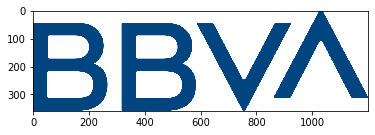

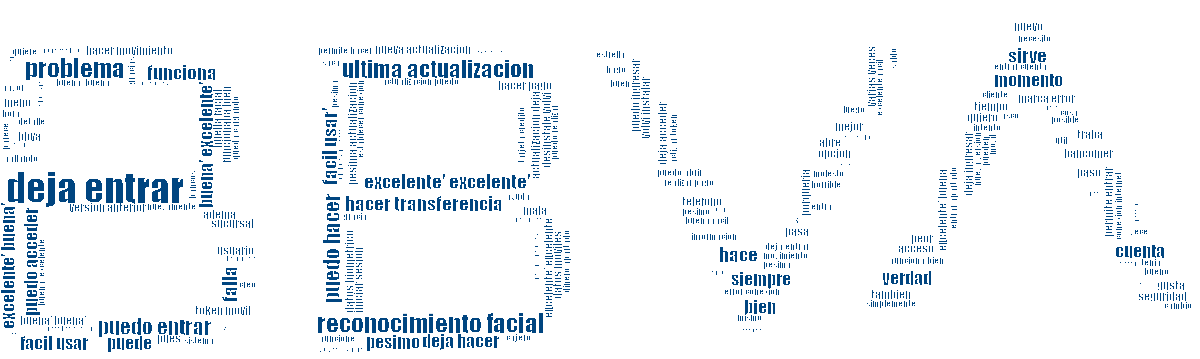

In [30]:
get_wordcloud(full_text, liga, img_name)

In [31]:
with open(BASE_DIR.joinpath('text.txt'), 'w') as f:
    f.write(full_text)